This notebook reads in SLC dates and plots temporal baseline for subsequent SLCs.

This notebook was organized on 9-26-22

***

Import things. Use conda environment oliviaJupyter.


In [1]:
import os,sys
import glob
import pandas
import datetime 
from dateutil import parser
from datetime import date, datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

Define working directory and crop directory

In [2]:
workdir = '/data/ocp4/LagunaSalada/Data_and_Figs/'
#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

Load in the dates from file names. Calculate # days between acquisitions.

In [3]:
dates = [os.path.basename(x) for x in glob.glob(workdir+cropdir+"SLC_vv/2*")]
dates=sorted(dates)

# convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))

# calculate dt between slcs 
dt = np.diff(slc_dates)

# convert to # of days 
dt2 = np.zeros(len(dt))
for i in range(0,len(dt)):
    dt2[i] = dt[i].days

Plot the # of days between acquisitions over time.

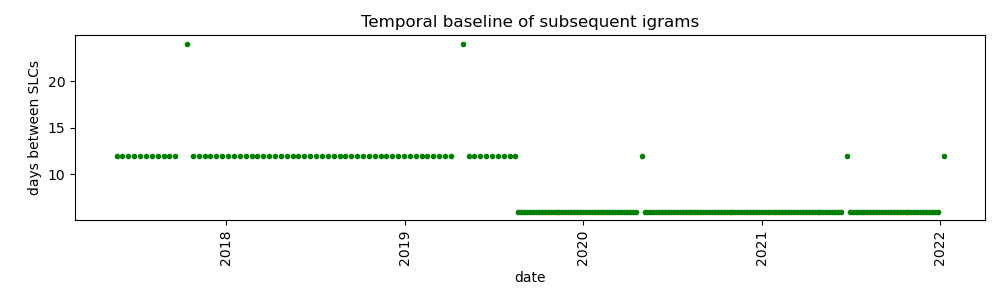

In [4]:
fig=plt.figure(figsize=(10,3), tight_layout=True)
plt.xticks(rotation = 90)
plt.plot(slc_dates[1::],dt2,'.g')
#plt.xlim([np.min(slc_dates), np.max(slc_dates)])
#plt.ylim([0, 16])
plt.xlabel('date')
plt.ylabel('days between SLCs')
plt.title('Temporal baseline of subsequent igrams')
plt.show()

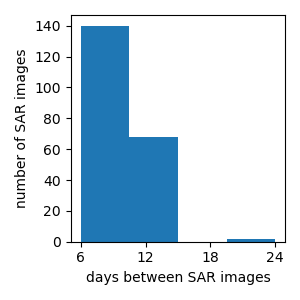

In [5]:
plt.figure(figsize=(3,3),tight_layout='TRUE')
plt.hist(dt2, bins=4); plt.xticks([6,12,18,24])
plt.xlabel('days between SAR images'); plt.ylabel('number of SAR images')
plt.show()


In [6]:
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'
# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1
# dates is a list of strings, convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))
igram_dates = slc_dates[1::]

start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(start_indices)

for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]]+' - '+str(dates[end_indices[i]])))
print('\ntotal duration of this study: '+str((igram_dates[-1]-igram_dates[0]).days/365.25)+' years')

colors_to_use = ['gold','hotpink','olive','coral','cornflowerblue','gray','burlywood']

interval 0: 20170510 - 20181125
interval 1: 20181207 - 20200412
interval 2: 20200418 - 20201208
interval 3: 20201214 - 20220108
interval 4: 20170510 - 20191220
interval 5: 20170510 - 20220108
interval 6: 20200412 - 20210119

total duration of this study: 4.632443531827516 years


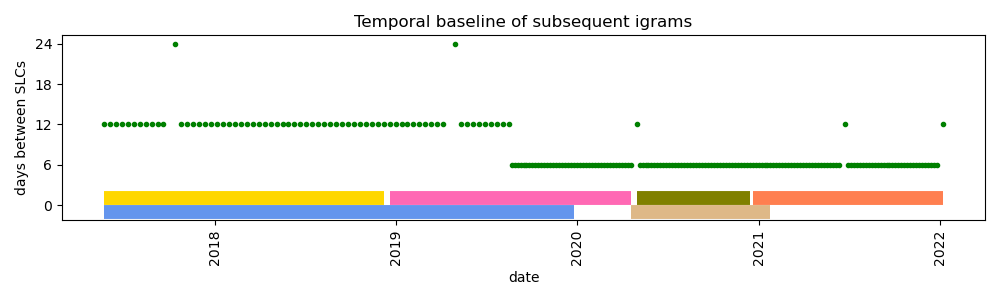

In [7]:
fig=plt.figure(figsize=(10,3), tight_layout=True)
plt.xticks(rotation = 90)
plt.plot(slc_dates[1::],dt2,'.g')
#plt.xlim([np.min(slc_dates), np.max(slc_dates)])
#plt.ylim([0, 16])
plt.xlabel('date')
plt.ylabel('days between SLCs')
plt.yticks([0,6,12,18,24])
plt.title('Temporal baseline of subsequent igrams')

yval = 1.0
linewid = 10.0
offset = 2
plt.hlines(yval,igram_dates[0],igram_dates[46],color='gold',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[47],igram_dates[107],color='hotpink',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[108],igram_dates[146],color='olive',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[147],igram_dates[-1],color='coral',linewidth=linewid,zorder=10)
plt.hlines(yval-offset,igram_dates[0],igram_dates[88],color='cornflowerblue',linewidth=linewid,zorder=10)
plt.hlines(yval-offset,igram_dates[107],igram_dates[153],color='burlywood',linewidth=linewid,zorder=10)

plt.show()